In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
fashion_train = pd.read_csv("C:\\Users\\Ramya\\Downloads\\P39-Fashion-MNIST-Python-Code\\fashion-mnist_train.csv",sep=',')
fashion_test = pd.read_csv("C:\\Users\\Ramya\\Downloads\\P39-Fashion-MNIST-Python-Code\\fashion-mnist_test.csv", sep = ',')

In [3]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
training = np.array(fashion_train, dtype = 'float32')
testing = np.array(fashion_test, dtype='float32')

 TRAINING THE MODEL

In [6]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [8]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



Using TensorFlow backend.


In [10]:

cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [11]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [12]:
epochs = 10

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))


C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 304s 6ms/step - loss: 0.9148 - accuracy: 0.6709 - val_loss: 0.4848 - val_accuracy: 0.8299
Epoch 2/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.4640 - accuracy: 0.8362 - val_loss: 0.4111 - val_accuracy: 0.8602
Epoch 3/10
48000/48000 [==============================] - 224s 5ms/step - loss: 0.4079 - accuracy: 0.8573 - val_loss: 0.4119 - val_accuracy: 0.8542
Epoch 4/10
48000/48000 [==============================] - 225s 5ms/step - loss: 0.3776 - accuracy: 0.8673 - val_loss: 0.3558 - val_accuracy: 0.8773
Epoch 5/10
48000/48000 [==============================] - 214s 4ms/step - loss: 0.3475 - accuracy: 0.8786 - val_loss: 0.3353 - val_accuracy: 0.8847
Epoch 6/10
48000/48000 [==============================] - 210s 4ms/step - loss: 0.3284 - accuracy: 0.8856 - val_loss: 0.3248 - val_accuracy: 0.8861
Epoch 7/10
48000/48000 [==============================] - 192s

In [17]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 12s 1ms/step
Test Accuracy : 0.902


In [18]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


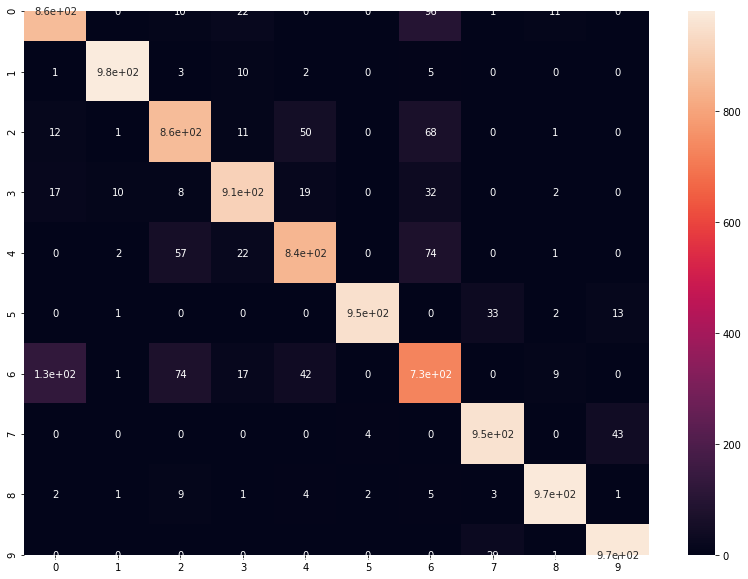

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [20]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.86      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.84      0.86      0.85      1000
     Class 3       0.92      0.91      0.91      1000
     Class 4       0.88      0.84      0.86      1000
     Class 5       0.99      0.95      0.97      1000
     Class 6       0.72      0.73      0.72      1000
     Class 7       0.94      0.95      0.94      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

